In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/satellite/sat.trn", sep=' ', header=None)
print(df.shape)
df_test = pd.read_csv("/content/drive/MyDrive/satellite/sat.tst", sep=' ', header=None)
print(df_test.shape)

(4435, 37)
(2000, 37)


**PreProcessing**


In [ ]:
missing_values_test = df_test.isnull().sum()
print(missing_values_test)
missing_values = df_1.isnull().sum()
print(missing_values)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
dtype: int64


In [ ]:
import pandas as pd

def check_missing_values(df_1):
    missing_values = df_1.isnull().sum().sum()
    if missing_values > 0:
        print("Veri kümesi boş değerler içeriyor.")
    else:
        print("Veri kümesi boş değerler içermiyor.")

check_missing_values(df_1) 


Veri kümesi boş değerler içermiyor.


In [ ]:
from sklearn.preprocessing import StandardScaler

def check_scaling(df_1):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_1)
    if not pd.DataFrame(scaled_data).equals(df_1):
        print("Veri kümesi ölçeklendirilmiş.")
    else:
        print("Veri kümesi ölçeklendirilmemiş.")

check_scaling(df_1) 


Veri kümesi ölçeklendirilmiş.


In [ ]:
import pandas as pd

def check_encoding(df_1):
    categorical_cols = df_1.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print("Veri kümesi kategorik değişkenlerin kodlandığı bir yapıya sahip.")
    else:
        print("Veri kümesi kategorik değişkenlerin kodlandığı bir yapıya sahip değil.")

check_encoding(df_1)  


Veri kümesi kategorik değişkenlerin kodlandığı bir yapıya sahip değil.


In [ ]:
df.rename(columns={36: 'Class'}, inplace=True)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [ ]:
df['Class'].value_counts()

1    1072
7    1038
3     961
2     479
5     470
4     415
Name: Class, dtype: int64

## Binary Classification

One frame of Landsat MSS imagery consists of four digital images of the same scene in different spectral bands. Two of these are in the visible region (corresponding approximately to green and red regions of the visible spectrum) and two are in the (near) infra-red. Each pixel is a 8-bit binary word, with 0 corresponding to black and 255 to white. The spatial resolution of a pixel is about 80m x 80m. Each image contains 2340 x 3380 such pixels.

The database is a (tiny) sub-area of a scene, consisting of 82 x 100 pixels. Each line of data corresponds to a 3x3 square neighbourhood of pixels completely contained within the 82x100 sub-area. Each line contains the pixel values in the four spectral bands (converted to ASCII) of each of the 9 pixels in the 3x3 neighbourhood and a number indicating the classification label of the central pixel. The number is a code for the following classes:


Remember that Number Class:

1 red soil

2 cotton crop

3 grey soil

4 damp grey soil

5 soil with vegetation stubble

6 mixture class (all types present)

7 very damp grey soil

In [ ]:
txt = ['top_left1', 'top_left2', 'top_left3', 'top_left4', 
       'top_center1', 'top_center2', 'top_center3', 'top_center4',
       'top_right1', 'top_right2', 'top_right3', 'top_right4',
       'middle_left1', 'middle_left2', 'middle_left3', 'middle_left4', 
       'middle_center1', 'middle_center2', 'middle_center3', 'middle_center4',
       'middle_right1', 'middle_right2', 'middle_right3', 'middle_right4',
       'bottom_left1', 'bottom_left2', 'bottom_left3', 'bottom_left4', 
       'bottom_center1', 'bottom_center2', 'bottom_center3', 'bottom_center4',
       'bottom_right1', 'bottom_right2', 'bottom_right3', 'bottom_right4', 'Class']
df = pd.read_csv("/content/drive/MyDrive/satellite/sat.trn", sep=' ', dtype=str, names=txt)
df

,top_left1,top_left2,top_left3,top_left4,top_center1,top_center2,top_center3,top_center4,top_right1,top_right2,...,bottom_left4,bottom_center1,bottom_center2,bottom_center3,bottom_center4,bottom_right1,bottom_right2,bottom_right3,bottom_right4,Class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,...,92,66,83,108,96,66,87,104,89,5
4431,64,71,108,96,68,75,108,96,71,87,...,96,66,87,104,89,63,87,104,89,5
4432,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,4
4433,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,4


In each line of data the four spectral values for the top-left pixel are given first followed by the four spectral values for the top-middle pixel and then those for the top-right pixel, and so on with the pixels read out in sequence left-to-right and top-to-bottom. 

 Thus, the four spectral values for the central pixel are given by attributes 17,18,19 and 20 (which would be 'middle_center1', 'middle_center2', 'middle_center3', 'middle_center4'). If you like you can use only these four attributes, while ignoring the others. This avoids the problem which arises when a 3x3 neighbourhood straddles a boundary.

In [ ]:
df_band1 = df[['top_left1', 'top_center1', 'top_right1', 
                 'middle_left1', 'middle_center1', 'middle_right1',
                 'bottom_left1', 'bottom_center1', 'bottom_right1']].astype('int')
df_band2 = df[['top_left2', 'top_center2', 'top_right2', 
                 'middle_left2', 'middle_center2', 'middle_right2', 
                 'bottom_left2', 'bottom_center2', 'bottom_right2']].astype('int')
df_band3 = df[['top_left3', 'top_center3', 'top_right3', 
                 'middle_left3', 'middle_center3', 'middle_right3', 
                 'bottom_left3', 'bottom_center3', 'bottom_right3']].astype('int')
df_band4 = df[['top_left4', 'top_center4', 'top_right4', 
                 'middle_left4', 'middle_center4', 'middle_right4', 
                 'bottom_left4', 'bottom_center4', 'bottom_right4']].astype('int')

In [ ]:
df_band1.values

array([[ 92,  84,  84, ..., 102,  88,  84],
       [ 84,  84,  80, ...,  88,  84,  84],
       [ 84,  80,  84, ...,  84,  84,  84],
       ...,
       [ 68,  71,  71, ...,  66,  63,  70],
       [ 71,  71,  76, ...,  63,  70,  70],
       [ 71,  76,  80, ...,  70,  70,  63]])

In [ ]:

df_band1.iloc[3000:3001]

,top_left1,top_center1,top_right1,middle_left1,middle_center1,middle_right1,bottom_left1,bottom_center1,bottom_right1
3000,60,53,64,64,60,71,63,59,71


In [ ]:
# soil with vegetation stubble
dfs = df_band1.iloc[3000:3001].to_numpy()
dfs

array([[60, 53, 64, 64, 60, 71, 63, 59, 71]])

In [ ]:
dfs = np.reshape(dfs, (3,3))
dfs

array([[60, 53, 64],
       [64, 60, 71],
       [63, 59, 71]])

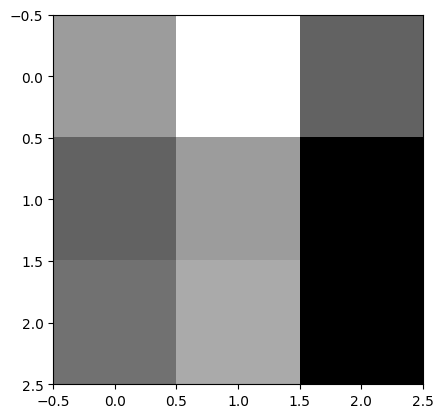

In [ ]:
import matplotlib

plt.imshow(dfs, cmap = matplotlib.cm.binary, interpolation='nearest')




# Binary Classification



In [ ]:
df_band1.head()

,top_left1,top_center1,top_right1,middle_left1,middle_center1,middle_right1,bottom_left1,bottom_center1,bottom_right1
0,92,84,84,101,92,84,102,88,84
1,84,84,80,92,84,84,88,84,84
2,84,80,84,84,84,84,84,84,84
3,80,84,80,84,84,76,84,84,84
4,84,80,80,84,76,76,84,84,79


In [ ]:
df_band1 = df_band1.to_numpy()
df_band2 = df_band2.to_numpy()
df_band3 = df_band3.to_numpy()
df_band4 = df_band4.to_numpy()

In [ ]:
df_band1[0]

array([ 92,  84,  84, 101,  92,  84, 102,  88,  84])

In [ ]:
band1, band2, band3, band4 = [], [], [], []

for i in range(0,len(df_band1)):
  array = df_band1[i]
  array = np.reshape(array, (3,3))
  band1.append(array)

for i in range(0,len(df_band2)):
  array = df_band2[i]
  array = np.reshape(array, (3,3))
  band2.append(array)

for i in range(0,len(df_band3)):
  array = df_band3[i]
  array = np.reshape(array, (3,3))
  band3.append(array)

for i in range(0,len(df_band4)):
  array = df_band4[i]
  array = np.reshape(array, (3,3))
  band4.append(array)

In [ ]:
band1[0]

array([[ 92,  84,  84],
       [101,  92,  84],
       [102,  88,  84]])

In [ ]:
len(band1)

4435

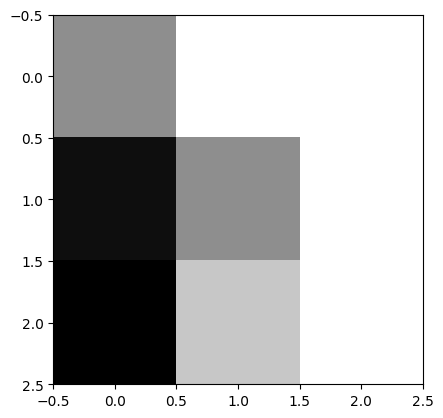

In [ ]:
import matplotlib

plt.imshow(band1[0], cmap = matplotlib.cm.binary, interpolation='nearest')

In [ ]:
df.columns

Index(['top_left1', 'top_left2', 'top_left3', 'top_left4', 'top_center1',
       'top_center2', 'top_center3', 'top_center4', 'top_right1', 'top_right2',
       'top_right3', 'top_right4', 'middle_left1', 'middle_left2',
       'middle_left3', 'middle_left4', 'middle_center1', 'middle_center2',
       'middle_center3', 'middle_center4', 'middle_right1', 'middle_right2',
       'middle_right3', 'middle_right4', 'bottom_left1', 'bottom_left2',
       'bottom_left3', 'bottom_left4', 'bottom_center1', 'bottom_center2',
       'bottom_center3', 'bottom_center4', 'bottom_right1', 'bottom_right2',
       'bottom_right3', 'bottom_right4', 'Class'],
      dtype='object')

In [ ]:
df_band1 = df[['top_left1', 'top_center1', 'top_right1', 
                 'middle_left1', 'middle_center1', 'middle_right1',
                 'bottom_left1', 'bottom_center1', 'bottom_right1', 'Class']].astype('int')
df_band2 = df[['top_left2', 'top_center2', 'top_right2', 
                 'middle_left2', 'middle_center2', 'middle_right2', 
                 'bottom_left2', 'bottom_center2', 'bottom_right2', 'Class']].astype('int')
df_band3 = df[['top_left3', 'top_center3', 'top_right3', 
                 'middle_left3', 'middle_center3', 'middle_right3', 
                 'bottom_left3', 'bottom_center3', 'bottom_right3', 'Class']].astype('int')
df_band4 = df[['top_left4', 'top_center4', 'top_right4', 
                 'middle_left4', 'middle_center4', 'middle_right4', 
                 'bottom_left4', 'bottom_center4', 'bottom_right4', 'Class']].astype('int')

In [ ]:
# Using only middle_center1
#band_1 = sat[['middle_center1', 'Class']].astype('int')
band_01 = df_band1.to_numpy() #band_1[['middle_center1']].to_numpy()

# Using only middle_center2
#band_2 = sat[['middle_center2', 'Class']].astype('int')
band_02 = df_band2.to_numpy() #band_2[['middle_center2']].to_numpy()

# Using only middle_center3
#band_3 = sat[['middle_center3', 'Class']].astype('int')
band_03 = df_band3.to_numpy() #band_3[['middle_center3']].to_numpy()

# Using only middle_center2
#band_4 = sat[['middle_center4', 'Class']].astype('int')
band_04 = df_band4.to_numpy() #band_4[['middle_center4']].to_numpy()
band_01

array([[92, 84, 84, ..., 88, 84,  3],
       [84, 84, 80, ..., 84, 84,  3],
       [84, 80, 84, ..., 84, 84,  3],
       ...,
       [68, 71, 71, ..., 63, 70,  4],
       [71, 71, 76, ..., 70, 70,  4],
       [71, 76, 80, ..., 70, 63,  4]])

In [ ]:
yband1_5 = (df_band1['Class'] == 7) # True for all 5s. False for others.
yband2_5 = (df_band2['Class'] == 7)
yband3_5 = (df_band3['Class'] == 7)
yband4_5 = (df_band4['Class'] == 7)
yband4_5

0       False
1       False
2       False
3       False
4       False
        ...  
4430    False
4431    False
4432    False
4433    False
4434    False
Name: Class, Length: 4435, dtype: bool

In [ ]:
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
sgd_clf1 = SGDClassifier(random_state=42, eta0=1, learning_rate='adaptive')
sgd_clf2 = SGDClassifier(random_state=42, eta0=1, learning_rate='adaptive')
sgd_clf3 = SGDClassifier(random_state=42, eta0=1, learning_rate='adaptive')
sgd_clf4 = SGDClassifier(random_state=42, eta0=1, learning_rate='adaptive')
sgd_clf1.fit(band_01, yband1_5)
sgd_clf2.fit(band_02, yband2_5)
sgd_clf3.fit(band_03, yband3_5)
sgd_clf4.fit(band_04, yband4_5)

SGDClassifier(eta0=1, learning_rate='adaptive', random_state=42)

In [ ]:
print(sgd_clf1.coef_)
print(sgd_clf2.coef_)
print(sgd_clf3.coef_)
print(sgd_clf4.coef_)

[[ -20.488392      9.35953732  -32.08611561  -13.44510743    6.51966991
   -33.03399729  -38.88856311   -3.90521181   -7.01158931 1551.52475039]]
[[ -28.38032684   19.68267597  -27.8683429     5.49599152   -5.11565531
   -10.10899701  -29.87247867    3.04487039   -4.57194929 1064.90339016]]
[[ -31.84726937    4.70936639  -31.48248275  -31.61812349   -3.00307657
     3.63209946  -57.36988163   55.13340638  -76.06028387 2176.2685544 ]]
[[ -32.69944063   14.72351036  -33.13508479   -9.02716484    7.15601615
   -14.69090729  -45.70919668   28.14581936  -41.40862195 1345.63163694]]


In [ ]:
band_01[0]

array([ 92,  84,  84, 101,  92,  84, 102,  88,  84,   3])

In [ ]:
detect1, detect2, detect3, detect4 = [],[],[],[]

for i in range(0,len(band_01)):
  pred1 = sgd_clf1.predict([band_01[i]])
  pred2 = sgd_clf2.predict([band_02[i]])
  pred3 = sgd_clf3.predict([band_03[i]])
  pred4 = sgd_clf4.predict([band_04[i]])
  detect1.append(pred1)
  detect2.append(pred2)
  detect3.append(pred3)
  detect4.append(pred4)

In [ ]:
unique, counts = np.unique(detect1, return_counts=True)
dict(zip(unique, counts))

{False: 3369, True: 1066}

In [ ]:
df['Class'].value_counts() # True positives

1    1072
7    1038
3     961
2     479
5     470
4     415
Name: Class, dtype: int64

In [ ]:
detect1[0]

array([False])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf1, band_01, yband1_5, cv=3, scoring="accuracy")

array([0.96822177, 0.94857916, 0.95196211])

In [ ]:
cross_val_score(sgd_clf2, band_02, yband2_5, cv=3, scoring="accuracy")

array([0.90872211, 0.90054127, 0.91069012])

In [ ]:
cross_val_score(sgd_clf3, band_03, yband3_5, cv=3, scoring="accuracy")

array([0.95605139, 0.99052774, 0.96549391])

In [ ]:
cross_val_score(sgd_clf4, band_04, yband4_5, cv=3, scoring="accuracy")

array([0.95740365, 0.98849797, 0.95737483])

In [ ]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, band_01, yband1_5, cv=3, scoring="accuracy")

array([0.81609195, 0.59539919, 0.88633288])

In [ ]:
cross_val_score(never_5_clf, band_02, yband2_5, cv=3, scoring="accuracy")

array([0.81609195, 0.59539919, 0.88633288])

In [ ]:
cross_val_score(never_5_clf, band_03, yband3_5, cv=3, scoring="accuracy")

array([0.81609195, 0.59539919, 0.88633288])

In [ ]:
cross_val_score(never_5_clf, band_04, yband4_5, cv=3, scoring="accuracy")

array([0.81609195, 0.59539919, 0.88633288])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred1 = cross_val_predict(sgd_clf1, band_01, yband1_5, cv=3)
y_train_pred2 = cross_val_predict(sgd_clf2, band_02, yband2_5, cv=3)
y_train_pred3 = cross_val_predict(sgd_clf3, band_03, yband3_5, cv=3)
y_train_pred4 = cross_val_predict(sgd_clf4, band_04, yband4_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yband1_5, y_train_pred1)

array([[3304,   93],
       [ 101,  937]])

## Precision and Recall

$Precision = \frac{True Positive}{True Positive + False Positive} = \frac{True Positive}{Total Predicted Positive} $

$Recall = \frac{True Positive}{True Positive + False Negative} = \frac{True Positive}{Total Actual Positive}$

$F1 = 2\times\frac{Precision\times Recall}{Precision + Recall}$

True positive = `yband1_5`

In [ ]:
 #These are the true positives (= 470), since they are taken directly from the original dataset.
print(yband1_5.value_counts())

False    3397
True     1038
Name: Class, dtype: int64


In [ ]:
detect1 = pd.DataFrame(detect1) #These are the False positives (taken from the SGDClassifier)
detect2 = pd.DataFrame(detect2)
detect3 = pd.DataFrame(detect3)
detect4 = pd.DataFrame(detect4)

print(detect1.value_counts(), '\n')
print(detect2.value_counts(), '\n')
print(detect3.value_counts(), '\n')
print(detect4.value_counts(), '\n')

False    3369
True     1066
dtype: int64 

False    3311
True     1124
dtype: int64 

False    3377
True     1058
dtype: int64 

False    3375
True     1060
dtype: int64 



In [ ]:
from sklearn.metrics import precision_score
precision_score(yband1_5, detect1) # = 470 / (470 + 334)

0.9193245778611632

In [ ]:
precision_score(yband2_5, detect2)

0.8096085409252669

In [ ]:
precision_score(yband3_5, detect3)

0.941398865784499

In [ ]:
precision_score(yband4_5, detect4)

0.9424528301886792

In [ ]:
from sklearn.metrics import recall_score
recall_score(yband1_5, y_train_pred1) # = 470 / (470 + [4101 - 3965])

0.9026974951830443

In [ ]:
recall_score(yband2_5, y_train_pred2) 

0.8265895953757225

In [ ]:
recall_score(yband3_5, y_train_pred3) 

0.9383429672447013

In [ ]:
recall_score(yband4_5, y_train_pred4) 

0.9373795761078998

In [ ]:
from sklearn.metrics import f1_score
f1_score(yband1_5, detect1)

0.9315589353612168

In [ ]:
f1_score(yband2_5, detect2)

0.8418131359851989

In [ ]:
f1_score(yband3_5, detect3)

0.950381679389313

In [ ]:
f1_score(yband4_5, detect4)

0.9523355576739752

In [ ]:
y_scores1 = cross_val_predict(sgd_clf1, band_01, yband1_5, cv=3, method="decision_function")
y_scores2 = cross_val_predict(sgd_clf2, band_02, yband2_5, cv=3, method="decision_function")
y_scores3 = cross_val_predict(sgd_clf3, band_03, yband3_5, cv=3, method="decision_function")
y_scores4 = cross_val_predict(sgd_clf4, band_04, yband4_5, cv=3, method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions1, recalls1, thresholds1 = precision_recall_curve(yband1_5, y_scores1)
precisions2, recalls2, thresholds2 = precision_recall_curve(yband2_5, y_scores2)
precisions3, recalls3, thresholds3 = precision_recall_curve(yband3_5, y_scores3)
precisions4, recalls4, thresholds4 = precision_recall_curve(yband4_5, y_scores4)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label='Precision')
  plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
  plt.xlabel('Threshold')
  plt.legend(loc='upper left')
  plt.ylim([0,1])

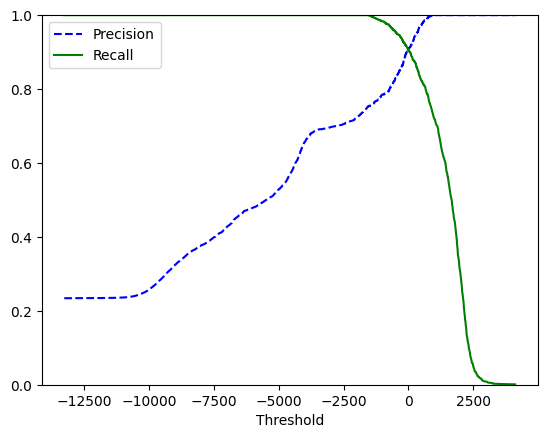

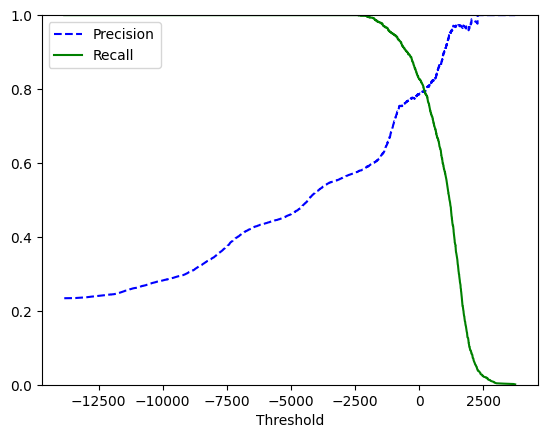

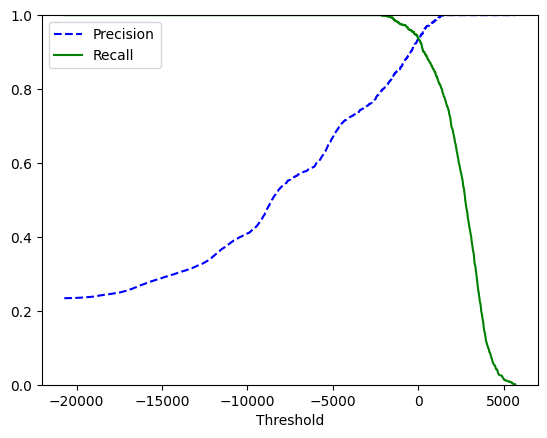

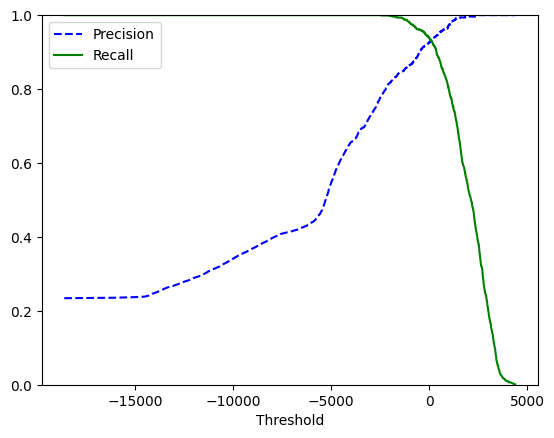

In [ ]:
plot_precision_recall_vs_threshold(precisions1, recalls1, thresholds1)
plt.show()
plot_precision_recall_vs_threshold(precisions2, recalls2, thresholds2)
plt.show()
plot_precision_recall_vs_threshold(precisions3, recalls3, thresholds3)
plt.show()
plot_precision_recall_vs_threshold(precisions4, recalls4, thresholds4)
plt.show()

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls[:-1], precisions[:-1], "b-")
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0,1])

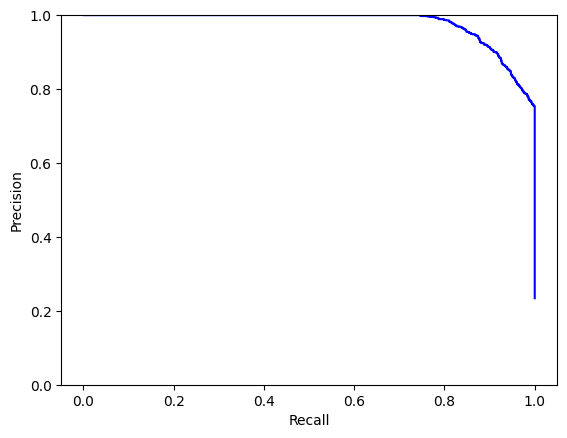

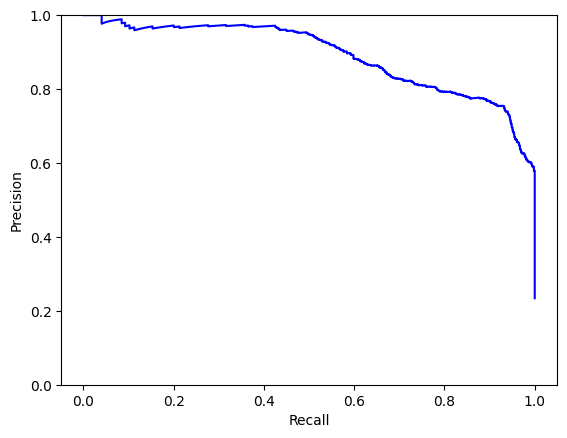

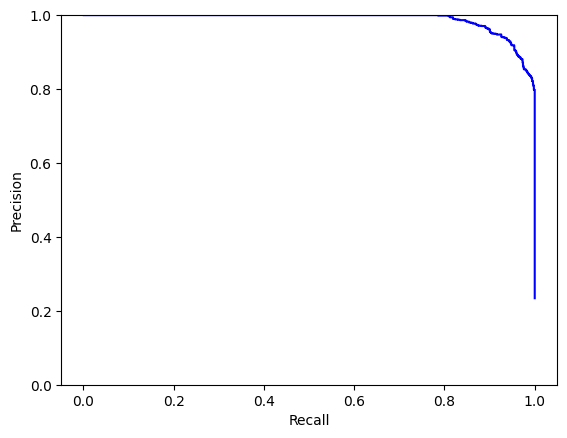

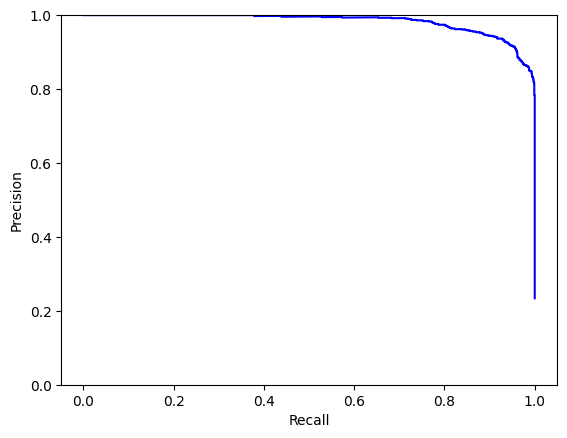

In [ ]:
plot_precision_vs_recall(precisions1, recalls1)
plt.show()
plot_precision_vs_recall(precisions2, recalls2)
plt.show()
plot_precision_vs_recall(precisions3, recalls3)
plt.show()
plot_precision_vs_recall(precisions4, recalls4)
plt.show()

This is very bad precision and recall. A 0.20 precision and recall is pure randomness, considering that we are sarching for one class among five (that is 0.2/1.0)

## The ROC Curve

In [ ]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(yband1_5, y_scores1)
fpr2, tpr2, thresholds2 = roc_curve(yband2_5, y_scores2)
fpr3, tpr3, thresholds3 = roc_curve(yband3_5, y_scores3)
fpr4, tpr4, thresholds4 = roc_curve(yband4_5, y_scores4)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

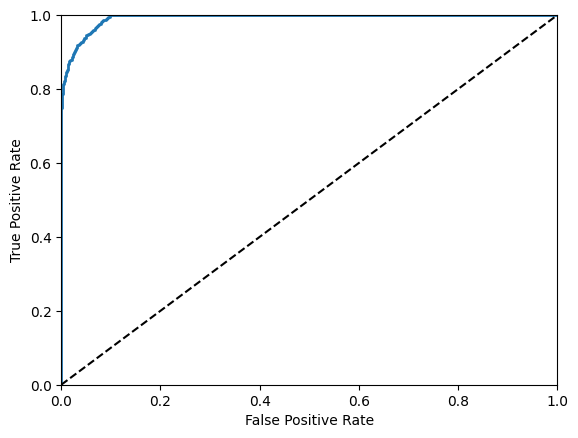

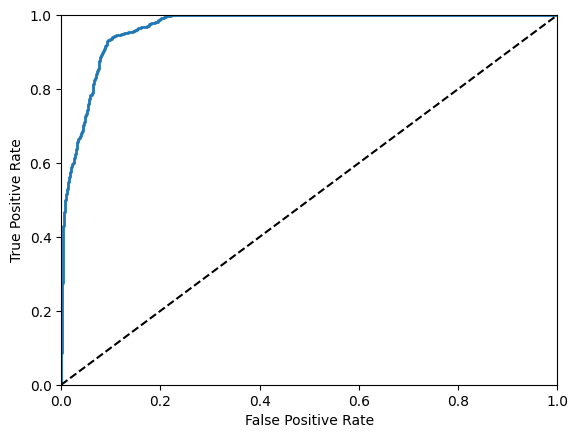

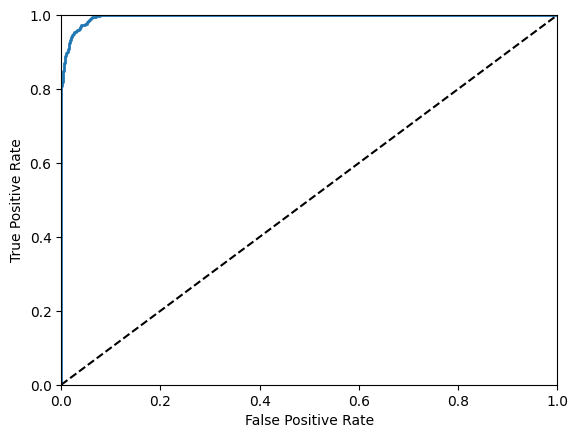

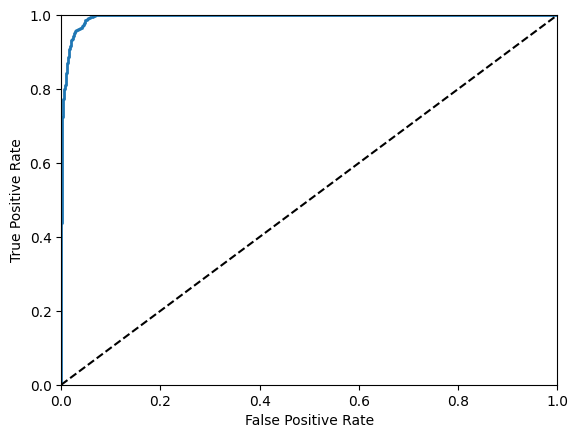

In [ ]:
plot_roc_curve(fpr1, tpr1)
plt.show()
plot_roc_curve(fpr2, tpr2)
plt.show()
plot_roc_curve(fpr3, tpr3)
plt.show()
plot_roc_curve(fpr4, tpr4)
plt.show()

To evaluate the ROC curve, we measure the area under the curve (AUC). If it is 1.0, it is perfect; if it is 0.5 it is purely random.

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(yband1_5, y_scores1)

0.992794276713614

In [ ]:
roc_auc_score(yband2_5, y_scores2)

0.9675251823126265

In [ ]:
roc_auc_score(yband3_5, y_scores3)

0.9962794441201944

In [ ]:
roc_auc_score(yband4_5, y_scores4)

0.9949649554775465

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest1 = cross_val_predict(forest_clf, band_01, yband1_5, cv=3, method='predict_proba')
y_probas_forest2 = cross_val_predict(forest_clf, band_02, yband2_5, cv=3, method='predict_proba')
y_probas_forest3 = cross_val_predict(forest_clf, band_03, yband3_5, cv=3, method='predict_proba')
y_probas_forest4 = cross_val_predict(forest_clf, band_04, yband4_5, cv=3, method='predict_proba')

In [ ]:
y_scores_forest1 = y_probas_forest1[:, 1] # score = proba of positive class
y_scores_forest2 = y_probas_forest2[:, 1]
y_scores_forest3 = y_probas_forest3[:, 1]
y_scores_forest4 = y_probas_forest4[:, 1]

In [ ]:
y_scores_forest1

array([0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.02])

In [ ]:
fpr_forest1, tpr_forest1, thresholds_forest1 = roc_curve(yband1_5, y_scores_forest1)
fpr_forest2, tpr_forest2, thresholds_forest2 = roc_curve(yband2_5, y_scores_forest2)
fpr_forest3, tpr_forest3, thresholds_forest3 = roc_curve(yband3_5, y_scores_forest3)
fpr_forest4, tpr_forest4, thresholds_forest4 = roc_curve(yband4_5, y_scores_forest4)

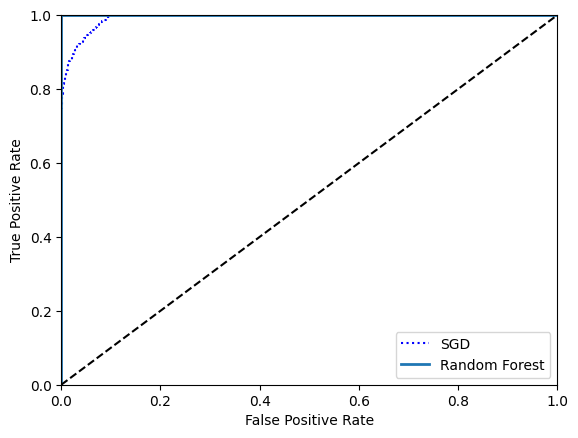

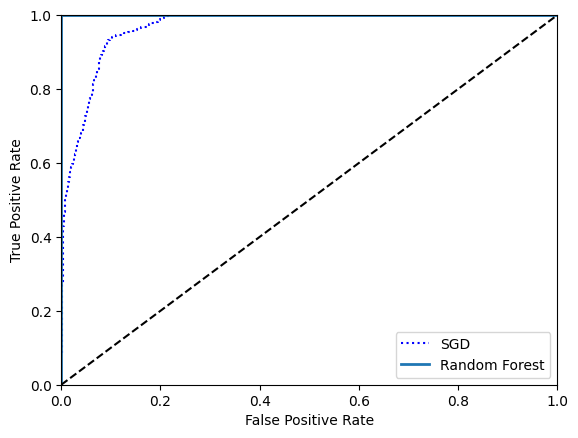

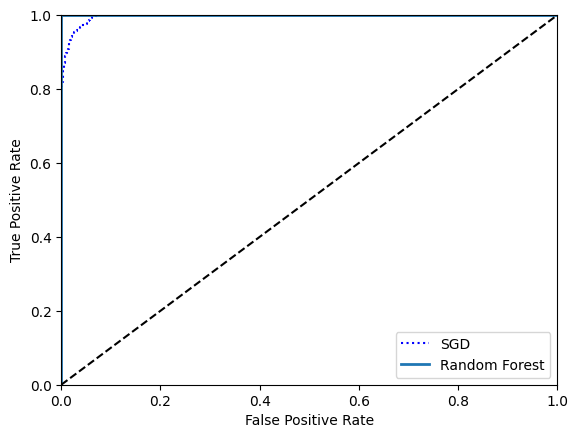

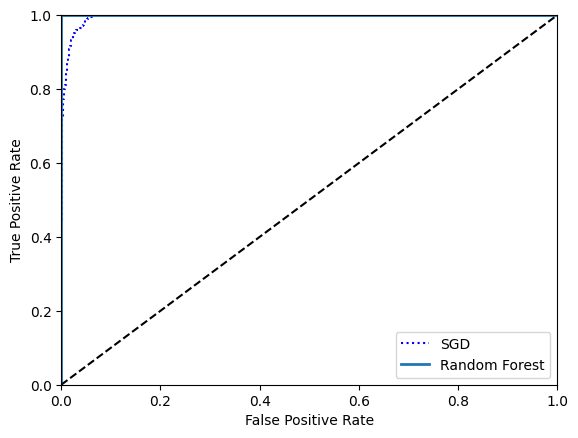

In [ ]:
plt.plot(fpr1, tpr1, 'b:', label='SGD')
plot_roc_curve(fpr_forest1, tpr_forest1, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

plt.plot(fpr2, tpr2, 'b:', label='SGD')
plot_roc_curve(fpr_forest2, tpr_forest2, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

plt.plot(fpr3, tpr3, 'b:', label='SGD')
plot_roc_curve(fpr_forest3, tpr_forest3, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

plt.plot(fpr4, tpr4, 'b:', label='SGD')
plot_roc_curve(fpr_forest4, tpr_forest4, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

## Multiclass Classification

In [ ]:
y_train = band_01[:,-1]

In [ ]:
band_01

array([[92, 84, 84, ..., 88, 84,  3],
       [84, 84, 80, ..., 84, 84,  3],
       [84, 80, 84, ..., 84, 84,  3],
       ...,
       [68, 71, 71, ..., 63, 70,  4],
       [71, 71, 76, ..., 70, 70,  4],
       [71, 76, 80, ..., 70, 63,  4]])

In [ ]:
df_band1 = df[['top_left1', 'top_center1', 'top_right1', 
                 'middle_left1', 'middle_center1', 'middle_right1',
                 'bottom_left1', 'bottom_center1', 'bottom_right1']].astype('int')
df_band2 = df[['top_left2', 'top_center2', 'top_right2', 
                 'middle_left2', 'middle_center2', 'middle_right2', 
                 'bottom_left2', 'bottom_center2', 'bottom_right2']].astype('int')
df_band3 = df[['top_left3', 'top_center3', 'top_right3', 
                 'middle_left3', 'middle_center3', 'middle_right3', 
                 'bottom_left3', 'bottom_center3', 'bottom_right3']].astype('int')
df_band4 = df[['top_left4', 'top_center4', 'top_right4', 
                 'middle_left4', 'middle_center4', 'middle_right4', 
                 'bottom_left4', 'bottom_center4', 'bottom_right4']].astype('int')

In [ ]:
df_band1[0:1]

,top_left1,top_center1,top_right1,middle_left1,middle_center1,middle_right1,bottom_left1,bottom_center1,bottom_right1
0,92,84,84,101,92,84,102,88,84


In [ ]:
dfs1 = []
for i in range(0,len(df_band1)):
  line = df_band1.iloc[i:i+1].to_numpy()
  dfs1.append(line)
dfs1[0]

array([[ 92,  84,  84, 101,  92,  84, 102,  88,  84]])

In [ ]:
band_01[0,-1]

3

In [ ]:
sgd_clf1.fit(df_band1, y_train)
sgd_clf1.predict(dfs1[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3])

In [ ]:
dfs1_scores = sgd_clf1.decision_function(dfs1[0])
dfs1_scores #it displays all 6 classes

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-6.30831673e+02, -1.31824073e+03,  2.32212678e+02,
         7.81336926e+00, -3.21478975e+02,  4.87605510e-01]])

In [ ]:
np.argmax(dfs1_scores) # Not really accurate

2

In [ ]:
sgd_clf1.classes_

array([1, 2, 3, 4, 5, 7])

In [ ]:
sgd_clf1.classes_[5]

7

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42)) # Trains a binary classifier for every pair of digits:
ovo_clf.fit(df_band1, y_train)
ovo_clf.predict(dfs1[0]) # Way better

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([3])

In [ ]:
len(ovo_clf.estimators_)

15

In [ ]:
forest_clf.fit(df_band1, y_train)
forest_clf.predict(dfs1[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([3])

In [ ]:
forest_clf.predict_proba(dfs1[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.92, 0.08, 0.  , 0.  ]])

In [ ]:
cross_val_score(sgd_clf1, df_band1, y_train, cv=3, scoring="accuracy")

array([0.43407708, 0.63125846, 0.54939107])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_band1.astype(np.float64))
cross_val_score(sgd_clf1, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.57944557, 0.49188092, 0.49458728])

## Multilabel Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(df_band1, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict(dfs1[0]) # Indeed, 3 is not large (False) but it is odd (True)

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, df_band1, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="micro")

0.5580608793686584